<IPython.core.display.Javascript object>


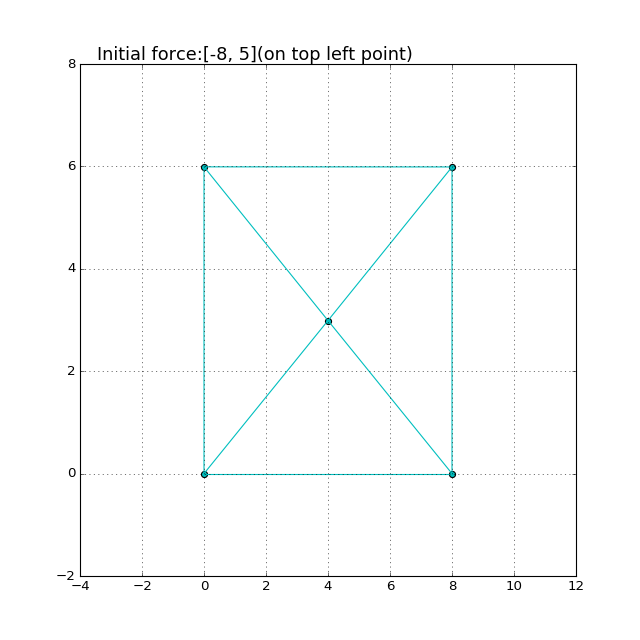

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

class Point:
    acc = [0,0]
    pos_new = [0,0]
    f_ext = [0,0] # N
    f_total = [0,0]
    def __init__(self, mass, pos, vel):
        self.mass = mass
        self.pos_old = pos
        self.pos = pos
        self.previous_vel = vel
        self.vel = vel
        
def initPoints():
    mass = 0.01   # kg
    vel = [0,0]   # m/s
    for i in range(len(pointsPos)):
        points.append(Point(mass, pointsPos[i], vel))
    
def drawLines():
    colour = 'c'
    plotLine(0, 1, colour)
    plotLine(0, 2, colour)
    plotLine(0, 4, colour)
    plotLine(1, 4, colour)
    plotLine(1, 3, colour)
    plotLine(2, 3, colour)
    plotLine(2, 4, colour)
    plotLine(3, 4, colour)

def plotLine(a, b, colour):
    ax.plot([points[a].pos[0],points[b].pos[0]], [points[a].pos[1],points[b].pos[1]], c=colour)
    
def drawPoints():
    for i in range(len(points)):
        ax.scatter(points[i].pos[0], points[i].pos[1], marker = 'o', s = 30, c = 'c')

def animate(i):
    # print(i)
    addExternalForce(i)
    updateStructure()
    ax.clear()
    drawPoints()
    drawLines()
    # ax.text(1,-0.15, 'text', transform=ax.transAxes, ha='right', fontsize=16)
    text = 'Initial force:'+ str(InitialForce) + '(on top left point)'
    ax.annotate(text, xy=(0, 1), xycoords='axes fraction', fontsize=16,
                xytext=(300,0), textcoords='offset points',
                ha='right', va='bottom')
    plt.grid()
    plt.axis([-4, 12, -2, 8])
    
    return points,

def addExternalForce(i):
    if i<1:
        points[2].f_ext = InitialForce
        # points[3].f_ext = InitialForce
        # points[4].f_ext = InitialForce
    else:
        points[2].f_ext = [0,0]
        points[3].f_ext = [0,0]
        points[4].f_ext = [0,0]

def length(p1, p2):
    a = p1.pos[0]-p2.pos[0]
    b = p1.pos[1]-p2.pos[1]
    return np.sqrt(a*a+b*b)

def updateStatus(p):
    p.vel[0] = p.vel[0]+p.acc[0]*dt
    p.pos[0] = p.pos[0]+p.vel[0]*dt
    p.vel[1] = p.vel[1]+p.acc[1]*dt
    p.pos[1] = p.pos[1]+p.vel[1]*dt

def sin_x(p2, p1):
    if p2.pos[1]-p1.pos[1]!=0:
        return np.sin(np.arctan((p2.pos[0]-p1.pos[0])/np.abs(p2.pos[1]-p1.pos[1])))
    else:
        return np.sin(np.radians(90))

def sin_y(p2, p1):
    if p2.pos[0]-p1.pos[0]!=0:
        return np.sin(np.arctan((p2.pos[1]-p1.pos[1])/np.abs(p2.pos[0]-p1.pos[0])))
    else:
        return np.sin(np.radians(90))

def updateStructure():
    
    # point0 and point1 are fixed on ground
    f_tn_p2 = [0,0]
    f_tn_p3 = [0,0]
    f_tn_p4 = [0,0]
    # Calculate force 
    f_tn_p2[0] = k*(length(points[2],points[3])-X32)*sin_x(points[3],points[2]) + k*(length(points[0],points[2])-X02)*sin_x(points[0],points[2])  + points[2].f_ext[0]  - c*points[2].vel[0] + k*(length(points[2],points[4])-X24)*sin_x(points[4],points[2])
    f_tn_p3[0] = -k*(length(points[2],points[3])-X32)*sin_x(points[3],points[2]) + k*(length(points[1],points[3])-X31)*sin_x(points[1],points[3])  + points[3].f_ext[0] - c*points[3].vel[0] + k*(length(points[3],points[4])-X34)*sin_x(points[4],points[3])
    f_tn_p4[0] = -k*(length(points[2],points[4])-X24)*sin_x(points[4],points[2]) - k*(length(points[3],points[4])-X34)*sin_x(points[4],points[3]) + points[4].f_ext[0] - c*points[4].vel[0] - k*(length(points[4],points[0])-X04)*sin_x(points[4],points[0]) - k*(length(points[1],points[4])-X14)*sin_x(points[4],points[1])

    # f_tn_p2[1] = -c*points[2].vel[1] + points[2].f_ext[1] - k*(length(points[2],points[3])-X32)*sin_y(points[3],points[2]) - k*(length(points[2],points[0])-X02)*sin_y(points[2],points[0]) - k*(length(points[2],points[4])-X24)*sin_y(points[2],points[4])
    f_tn_p3[1] = -c*points[3].vel[1] + points[3].f_ext[1] + points[3].mass*g[1] + k*(length(points[2],points[3])-X32)*sin_y(points[3],points[2]) - k*(length(points[3],points[1])-X31)*sin_y(points[3],points[1]) - k*(length(points[3],points[4])-X34)*sin_y(points[3],points[4])
    # f_tn_p4[1] = -c*points[4].vel[1] + points[4].f_ext[1] + k*(length(points[2],points[4])-X24)*sin_y(points[2],points[4]) + k*(length(points[3],points[4])-X34)*sin_y(points[3],points[4]) - k*(length(points[4],points[0])-X04)*sin_y(points[4],points[0]) - k*(length(points[4],points[1])-X14)*sin_y(points[4],points[1])

    # # Calculate acceleration, velocity and new position
    points[2].acc[0] = f_tn_p2[0]/points[2].mass
    points[2].acc[1] = f_tn_p2[1]/points[2].mass
    updateStatus(points[2])
    points[3].acc[0] = f_tn_p3[0]/points[3].mass
    points[3].acc[1] = f_tn_p3[1]/points[3].mass
    updateStatus(points[3])
    points[4].acc[0] = f_tn_p4[0]/points[4].mass
    points[4].acc[1] = f_tn_p4[1]/points[4].mass
    updateStatus(points[4])


    # p1.acc[0] = f_tn_p1[0]/p1.mass
    # p1.pos_new[0] = 2*p1.pos[0] - p1.pos_old[0] + p1.acc[0]*dt*dt  # Verlet integration
    # p1.vel[0] = (p1.pos_new[0] - p1.pos[0])/(2.0*dt)               # Stormer-Verlet
    # p1.pos_old[0] = p1.pos[0]                                      # Update old position
    # p1.pos[0] = p1.pos_new[0]                                      # Update new position
    
    # p2.acc[0] = f_tn_p2[0]/p2.mass
    # p2.pos_new[0] = 2*p2.pos[0] - p2.pos_old[0] + p2.acc[0]*dt*dt
    # p2.vel[0] = (p2.pos_new[0] - p2.pos[0])/(2.0*dt)
    # p2.pos_old[0] = p2.pos[0]
    # p2.pos[0] = p2.pos_new[0]
            
    
dt = 1./30
g = [0, -9.8]  # gravity
k = 9#0.2
c = 0.1
X01 = 8
X02 = 6
X04 = 5

X31 = 6
X32 = 8
X34 = 5

X14 = 5
X24 = 5

points = []
groundY = 0.0

InitialForce = [-8, 5]

#  2 ------------- 3
#   |\           /|
#   | \         / |
#   |  \       /  |
#   |   \     /   |         
#   |    \   /    |
#   |     \ /     |
#   |             |
#   |      4      |
#   |             |
#   |     / \     |
#   |    /   \    |  
#   |   /     \   |
#   |  /       \  |               
#   | /         \ |
#   |/           \|
#  0 ------------- 1  

pointsPos = [[0,0], [8,0], [0,6], [8,6], [4,3]] # 0, 1, 2, 3, 4
initPoints()

# set up figure and ax
fig, ax = plt.subplots(figsize=(8,8))
ani = animation.FuncAnimation(fig, animate, frames=200, interval=10)
plt.show()



